In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.tsv',sep='\t')

In [4]:
df.head(20)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
df.tail(20)

,PhraseId,SentenceId,Phrase,Sentiment
156040,156041,8544,"is darkly atmospheric , with Herrmann quietly ...",2
156041,156042,8544,"is darkly atmospheric , with Herrmann quietly ...",2
156042,156043,8544,"is darkly atmospheric ,",2
156043,156044,8544,is darkly atmospheric,3
156044,156045,8544,with Herrmann quietly suggesting the sadness a...,2
156045,156046,8544,Herrmann quietly suggesting the sadness and ob...,2
156046,156047,8544,Herrmann,2
156047,156048,8544,quietly suggesting the sadness and obsession b...,1
156048,156049,8544,suggesting the sadness and obsession beneath H...,2
156049,156050,8544,suggesting the sadness and obsession,2


In [8]:
df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

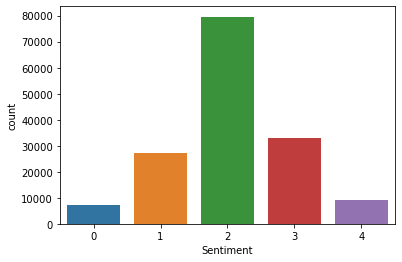

In [10]:
import seaborn as sns

sns.countplot(x='Sentiment',data=df)

## Sentiment Analysis using TextBlob (or Pretrained Model)

In [24]:
from textblob import TextBlob

textblob_sentiment=[]

for review in df.Phrase:
    text = TextBlob(review)
    sentiment_ = text.sentiment
    textblob_sentiment.append(sentiment_[0])

In [26]:
len(textblob_sentiment)

156060

In [27]:
df['tb_sentiment_score'] = textblob_sentiment

In [28]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,tb_sentiment_score
0,1,1,A series of escapades demonstrating the adage ...,1,0.4
1,2,1,A series of escapades demonstrating the adage ...,2,0.7
2,3,1,A series,2,0.0
3,4,1,A,2,0.0
4,5,1,series,2,0.0


## Sentiment Analysis using Dictionary

In [32]:
pos_list = open('positive-words.txt').read().split()
neg_list = open('negative-words.txt').read().split()

In [44]:
from nltk.tokenize import word_tokenize

sentiment_score = []

for review in df.Phrase:
    pos_count = 0
    neg_count = 0
    tokenized_words=word_tokenize(review.lower())
    for word in tokenized_words:
        if word in pos_list:
            pos_count = pos_count + 1
        if word in neg_list:
            neg_count = neg_count + 1
#     print(pos_count,neg_count)
    score = pos_count - neg_count
    sentiment_score.append(score)

2 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
2 0
0 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
2 2
2 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 4
3 4
3 3
2 0
2 0
1 0
1 0
1 0
0 0
1 3
1 3
0 0
0 0
1 3
0 0
1 3
1 3
1 0
0 3
0 3
0 1
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 2
0 0
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
2 0
0 0
0 0
2 0
2 0
0 0
2 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
2 1
2 1
1 0
1 0
1 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 3
0 0
0 0
1 3
1 3
1 3
1 3
1 3
1 3
0 2
0 2
0 1
0 1
0 1
0 0
1 1
1 1
0 0
1 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 1
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 0
1 0
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 1
0 1
0 0
0 1
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 1
0 1
0 0
0 3
0 3
0 3
0 3
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
3 0
1 0
2 0
2 0
0 0
0 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 0
0 1
1 0
1 0
1 0
0 0
0 3
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 1
1 1
0 1
0 1
0 0
2 0
2 0
2 0
2 0
0 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0


0 0
1 0
1 0
0 4
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 4
0 3
0 3
0 3
0 0
0 3
0 3
0 3
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
2 0
2 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
2 1
2 1
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
1 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
0 1
0 1
0 1
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
5 0
3 0
0 0
0 0
3 0
0 0
0 0
3 0
1 0
1 0
2 0
2 0
1 0
1 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 0
0 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
3 0
1 0
1 0
1 0
2 0
2 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
0 2
0 2
0 2
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
1 0
0 0
0 0
0 0
0 0
3 1
3 1
2 1
2 1
0 0
0 0
2 1
2 1


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
2 1
2 1
2 1
0 0
0 0
2 1
0 0
0 0
0 0
2 1
2 1
1 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2


2 2
2 2
0 0
0 0
2 2
2 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
2 1
0 0
2 1
2 1
1 0
1 0
1 0
0 0
1 1
1 1
1 1
0 1
0 1
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
0 0
1 1
1 1
1 1
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
3 1
3 1
1 0
1 0
1 0
0 0
0 0
2 1
1 0
1 1
1 1
1 1
1 0
0 1
0 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
4 0
4 0
4 0
3 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
2 0
0 0
2 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
2 0
2 0
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
2 1
2 1
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
2 1
2 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
4 0
4 0
1 0
1 0
1 0
1 0
1 0


1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
0 0
2 0
2 0
2 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 2
1 1
1 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 0
0 0
1 0
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 3
0 0
0 0
0 0
0 0
0 3
0 3
0 0
0 3
0 0
0 0
0 0
0 3
0 3
0 1
0 1
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 0
3 0
3 0
2 0
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0


2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
2 2
1 0
1 0
1 0
1 0
1 0
0 0
1 2
1 2
0 1
0 1
0 1
0 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 1
1 1
1 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 1
0 0
0 0
0 0
0 1
0 1


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 1
0 1
0 1
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 0
0 0
1 0
1 0
0 0
1 0
0 2
0 2
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
1 1
0 0
1 1
1 1
1 1
0 1
0 0
0 1
0 1
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
0 1
0 1
0 1
0 1
3 0
3 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
5 1
5 1
4 0
4 0
4 0
4 0
1 0
1 0
3 0
3 0
1 0
1 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 1
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
2 0
2 0
2 0
2 0
2 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0


1 2
1 2
0 1
1 1
0 1
0 1
1 0
1 0
1 0
0 0
0 0
1 1
1 1
0 1
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
5 2
2 2
1 2
1 2
0 2
0 1
1 0
1 0
3 0
3 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
0 0
2 0
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 3
0 3
0 2
0 2
0 2
0 2
0 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 1
1 1
1 0
0 0
1 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 1
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
1 3
1 3
1 3
1 3
1 3
1 3
1 3
1 3
0 1
0 1
0 1
0 0
1 2
1 2
0 0
0 0
1 2
0 1
0 0
0 0
0 1
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
2 2
2 2
2 2
0 1
0 1
0 1
2 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 0
0 0


1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
0 0
0 0
0 0
0 0
0 0
2 1
2 1
2 1
2 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
3 0
3 0
3 0
3 0
3 0
3 0
3 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
3 1
3 1
3 1
3 1
3 1
3 1
3 1
2 1
2 0
1 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 2
0 2
0 2
0 2
0 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
4 0
1 0
3 0
3 0
0 0
0 0
0 0
3 0
3 0
3 0
0 0
0 0
3 0
3 0
3 0
2 0
2 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


1 1
0 0
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
3 1
3 1
0 0
3 1
3 1
0 1
0 1
0 0
0 0
0 0
0 0
3 0
3 0
3 0
1 0
1 0
1 0
2 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
2 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 0
1 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 1
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1


0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
1 2
1 2
0 2
0 1
0 1
0 0
0 0
1 0
1 0
0 0
1 2
0 2
0 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 2
1 2
0 0
0 0
0 0
1 2
1 2
1 1
1 1
1 1
1 1
1 1
1 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
2 0
2 0
2 0
2 0
2 0
0 0
2 0
2 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 1
0 0
0 0
2 2
2 2
0 0
2 2
2 2
1 0
1 0
1 2
0 1
0 1
0 0
1 1
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
2 1
2 1
2 1
1 0
1 1
0 1
0 1
1 0
2 2
2 2
2 2
2 2
1 2
0 1
0 1
0 0
0 0
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 3
1 3
1 3
1 3
1 3
1 0
0 3
0 0
0 3
0 3
0 1
0 1
0 1
0 0
0 2
0 2
0 0
0 2
0 2
0 1
0 0
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 0
0 2
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
3 1
3 1
0 1
0 1


2 1
2 1
2 1
2 1
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 0
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 3
0 1
0 1
0 1
1 2
0 0
1 2
0 1
0 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 1
2 0
0 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
2 2
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 2
1 2
1 2
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 1
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
2 0
2 0
2 0
0 0
2 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0


1 1
1 1
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 5
0 0
0 0
0 0
1 5
1 5
1 5
1 0
1 0
0 5
0 2
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 3
0 3
0 2
0 0
0 2
0 2
0 2
0 2
0 0
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 2
0 2
0 2
0 0
0 2
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
3 2
3 2
2 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 1
0 0
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
1 0
0 0
0 0
0 0
2 2
1 1
1 1
1 1
1 1
0 1
0 1
0 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 2
1 1
1 1
1 0
1 0
1 0
0 1
0 1
1 2
0 1
0 1
0 1
0 1
1 1


0 0
2 2
2 2
1 0
1 2
1 2
1 2
1 1
1 1
0 1
0 0
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
0 0
1 2
1 2
0 0
1 2
1 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 1
1 0
1 0
0 0
0 0
0 0
1 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
4 1
4 1
4 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
3 1
3 1
3 1
0 0
3 1
1 0
2 1
2 1
2 1
2 1
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 0
1 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0


0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
2 1
2 1
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 1
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 3
3 3
2 2
2 2
2 2
2 2
2 2
2 0
2 0
1 0
1 0
1 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 3
0 3
0 1
0 1
0 1
0 2
0 2
0 2
0 1
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
1 0
1 0
1 0
1 0
0 0


1 2
0 2
0 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
1 0
1 0
0 0
0 0
2 2
2 2
2 0
2 0
2 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 2
0 2
0 2
0 2
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 2
0 0
0 0
0 0
0 0
0 0
3 2
3 2
3 2
3 2
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
2 2
2 2
1 2
1 2
1 2
1 2
0 1
1 1
0 0
0 0
0 0
3 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 1
0 1
0 1
2 0
0 0
2 0
2 0
2 0
2 0
0 0


1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 3
1 3
1 3
1 3
1 3
0 2
0 2
0 1
0 1
0 1
0 0
0 1
1 1
1 1
0 0
1 1
0 1
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
3 0
3 0
0 0
0 0
3 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
3 0
3 0
1 0
1 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
0 1
0 1
0 3
0 3
0 2
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
3 1
3 1
3 1
1 0
1 0
0 0
2 1
2 1
2 0
2 0
2 0
2 0
2 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0


1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 2
1 2
1 0
1 0
1 0
1 0
0 0
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
0 3
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 1
1 1
1 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 3
0 3
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 2
1 1
1 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
3 2
3 2
2 1
2 1
1 1
1 1
1 1
1 0
1 0
0 1
0 1
0 0
0 0
1 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
1 0
3 2
0 0
3 2
3 2
3 2
3 2
0 0
0 0
0 0
0 0
3 2
3 2
3 2
2 0
1 2
1 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1


2 1
0 1
0 1
0 1
0 1
0 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 5
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 4
0 4
0 4
0 4
0 4
0 1
0 3
0 3
0 3
0 2
0 2
0 2
0 2
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
3 1
3 1
3 1
3 1
2 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
1 1
1 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


1 2
0 2
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
3 0
2 0
2 0
2 0
1 0
0 0
1 0
1 0
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 3
0 2
0 2
0 0
0 0
0 0
0 2
0 2
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 2
0 2
0 1
0 1
0 0
3 1
3 1
2 0
2 0
2 0
2 0
0 0
2 0
2 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 4
2 4
2 3
2 3
2 3
2 3
1 2
1 2
1 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
2 1
2 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
0 0
3 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 1
2 1
2 1
1 1
1 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 3
0 2


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 5
0 0
0 0
0 5
0 5
0 5
0 3
0 3
0 1
0 1
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 2
0 1
0 1
0 1
0 3
0 0
0 0
0 0
0 0
0 3
0 3
0 3
0 1
0 2
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
2 1
2 1
2 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
0 0
0 0
0 0
0 0
2 1
2 1
2 1
2 1
2 1
2 1
1 0
1 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
0 1
0 1
0 1
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
1 0
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 2
0 0
0 0
0 0
1 2
1 2
0 0
0 0
0 0
0 0
0 0
0 0
1 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 1
0 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0


0 0
0 0
0 0
0 0
2 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
3 1
1 0
2 1
2 1
2 1
2 1
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 0
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
3 0
3 0
3 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
3 1
3 1
3 1
3 1
0 0
0 0
3 1
3 1
2 1
2 1
2 1
0 0
2 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0


0 0
0 0
0 0
0 0
1 2
0 2
0 2
0 2
0 1
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
1 1
1 1
1 0
1 0
1 0
0 1
0 1
0 1
0 0
0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
0 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 2
1 2
1 2
1 2
1 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
2 1
2 1
0 1
0 1
0 1
0 1
0 1
0 1
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
2 1
2 1
1 1
1 1
1 1
1 0
1 0
0 1
3 2
3 2
3 1
3 1
3 1
2 1
0 0
2 1
2 1
2 1
2 1
2 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
3 1
3 1
1 0
1 0
1 0
2 1
2 0
2 0
1 0
1 0
1 0
1 0
0 1
0 1
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
3 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 4
1 4
0 2
0 2
0 2
0 2
1 2
1 2
1 2
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
1 0
2 2
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
1 2
0 1
0 1
0 1
0 1
0 0
0 0
0 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1


0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
0 0
2 1
2 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 2
1 2
0 1
0 1
0 0
1 1
1 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 4
0 1
0 1
0 1
0 3
0 3
0 3
0 3
0 3
0 3
0 3
0 3
0 3
0 3
0 1
0 1
0 1
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
1 2
0 2
0 2
0 2
0 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
1 2
1 2
1 2
1 2
1 2
1 2
0 0
0 0
0 0
1 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 1
0 1
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
2 2
2 2
2 2
2 2
2 2
2 2
1 2
1 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 1
3 1
3 1
3 1
3 1
3 1
3 0
3 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 3
0 1
0 1
0 1
0 0
0 0
0 0
0 2
0 2
0 2
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 4
1 4
1 3
1 3
1 3
0 1
0 0
1 2
1 0
1 0
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 4
2 4
0 2
0 2
0 2
0 0
0 0
0 2
0 2
0 0
0 2
0 2
0 0
0 0
0 2
0 2
0 2
0 1
2 2
2 2
2 2
0 2
0 2
0 0
0 2
0 1
2 0
2 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0


1 1
1 1
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 2
1 2
1 2
1 2
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 1
0 5
0 5
0 3
0 3
0 1
0 1
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
2 1
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
2 2
2 1
2 1
2 1
1 1
1 1
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
2 0
2 0
2 0


0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
0 0
0 0
0 0
1 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
4 1
4 1
4 1
4 1
4 1
1 0
0 0
0 0
0 0
3 1
3 1
0 0
0 0
0 0
0 0
3 1
3 1
0 1
3 0
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
2 2
2 2
2 2
2 2
0 1
0 1
0 1
0 1
0 1
2 1
2 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 2
0 0
0 0
0 0
0 2
0 2
0 2
0 0
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 2
3 2
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
2 2
2 2
2 2
2 0
2 0
2 0
1 0
0 2
0 2
0 2
0 0
0 2
0 0
0 2
0 2
0 2
0 2
1 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
1 0
0 0
0 0
5 2
5 2
3 0
3 0
2 0
2 2
2 2
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
2 1
0 0
0 0
2 1
2 1
2 0
2 0
2 0
0 1
0 1
4 0
2 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
2 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
2 1
0 1
0 0
2 0
2 0
2 0
2 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0


1 1
0 0
1 1
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
1 1
1 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 0
1 0
1 0
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
3 3
2 3
2 3
0 0
2 3
0 0
2 3
2 3
2 1
2 0
2 0
2 0
0 2
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 3
0 1
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 1
1 0


1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
1 0
1 0
1 0
1 0
1 0
1 2
1 2
1 2
1 2
1 2
0 1
0 1
0 0
1 1
1 1
1 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
2 1
1 1
1 1
1 1
1 1
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
2 3
1 2
1 2
1 2
1 2
0 0
1 2
1 2
1 2
1 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
2 0
2 0
2 0
2 0
1 2
1 2
1 2
1 0
1 0
1 0
1 0
0 0
1 0
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
0 0
3 0
2 0
2 0
2 0
2 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
3 1
3 1
3 1
3 1
2 0
2 0
1 0
0 0
1 0
1 0
1 0
0 0
1 1
1 1
0 0
1 1
1 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 3
1 3
1 3
1 3
1 2
0 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
4 1
0 0
0 0
0 0
0 0
4 1
4 1
3 1
3 1
1 0
1 0
1 0
0 0
0 0
0 0
2 1
2 1
2 1
1 1
0 1
0 1
1 0
1 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0


1 1
1 1
1 1
1 1
0 0
3 0
0 0
0 0
0 0
0 0
3 0
3 0
3 0
3 0
3 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
1 2
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
5 1
5 1
4 1
4 1
4 1
4 1
0 0
4 1
3 1
3 1
2 1
2 1
1 1
1 1
1 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 4
0 3
0 3
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 0
1 0
1 1
1 1
0 1
0 1
0 1
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
2 0
2 0
2 0
0 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
2 0


0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 1
1 2
1 2
1 2
1 2
0 0
0 0
1 2
1 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 0
1 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 1
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
3 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 2
3 2
3 2
2 1
2 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
2 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 1
1 0
0 3
0 3
0 3
0 3
0 2
0 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0


1 2
1 0
1 0
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 0
1 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
1 3
1 3
1 3
0 1
0 1
1 2
1 2
1 2
0 0
0 0
0 0
1 2
1 2
0 2
0 2
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 1
0 0
0 0
0 0
0 0
0 0
2 4
0 1
0 1
0 0
0 0
2 3
2 3
2 3
1 2
1 2
0 2
0 0
0 2
0 1
0 1
0 0
0 1
1 0
0 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 2
1 0
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
5 1
5 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
5 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
3 0
3 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
4 1
1 1
1 0
1 0
1 0


1 0
1 0
1 0
1 0
1 0
0 0
4 1
2 0
2 0
2 0
2 0
2 0
1 0
0 0
2 1
2 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 0
0 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
1 2
0 0
0 0
0 0
0 0
1 2
1 2
0 0
1 2
1 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 0
1 2
1 2
1 1
1 1
1 1
1 1
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
2 1
2 1
1 1
1 1
1 1
1 0
0 0
0 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 0
0 0
0 0
0 1
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 4
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 4
0 0
0 4
0 1
0 1
0 1
0 1
0 3
0 3
0 1
0 0
0 1
0 1
0 1
0 1
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 4
0 4
0 4
0 4
0 4
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 0
0 1
0 1
0 1
0 1
1 2
1 2
1 2
1 0
0 0
0 0
0 2
0 2
0 1
0 1
1 0
1 0
1 1
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 3
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
1 2
0 1
0 1
0 1
0 1
0 1
1 1
0 0
0 0
0 0


0 4
0 0
0 0
0 4
0 4
0 1
0 1
0 3
0 3
0 1
0 1
0 0
0 2
0 2
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
1 1
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
2 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1


0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
2 1
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
2 1
2 1
2 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 0
1 0
0 0
1 0
1 0
1 1
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 2
0 0
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 2
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 1
1 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
2 2
1 1
1 0
1 0
1 0
1 0
0 1
1 1
1 1
1 1
1 1
1 1
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
1 1
1 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 0
1 0
1 0
1 0
0 3
0 3
0 3
0 3
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
2 1
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
1 0
1 0
1 1
1 1
0 1
1 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
3 0
3 0
3 0
3 0
3 0
0 0
3 0
3 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0


0 3
0 2
0 1
0 0
1 2
1 2
1 2
1 0
1 0
0 0
0 2
0 2
0 1
2 1
0 0
0 0
2 1
2 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
1 0
1 0
1 0
2 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 4
3 4
3 4
3 4
3 3
3 3
3 3
3 3
3 3
3 3
0 1
0 0
0 1
0 1
3 2
3 1
3 1
1 0
1 0
1 0
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
0 0
0 1
0 0
0 1
1 1
0 0
1 1
1 1
1 1
1 1
3 0
3 0
3 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 1
2 1
2 1
0 0
0 0
2 1
2 1
2 1
2 1
1 1
0 1
0 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0


0 3
0 1
0 2
0 2
0 2
0 2
0 1
0 1
2 3
0 0
2 3
0 2
0 2
0 1
0 1
2 1
2 1
2 1
2 1
2 1
2 1
2 0
2 0
2 0
2 0
1 0
3 3
0 0
3 3
3 3
1 1
1 1
1 0
2 2
2 2
1 2
1 2
0 1
0 1
0 1
0 1
0 0
0 0
1 1
1 1
1 0
0 1
0 1
0 1
0 1
0 1
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
2 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
2 1
2 1
2 0
2 0
2 0
2 0
0 0
2 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0


0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 2
1 2
1 2
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 0
1 1
1 1
1 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
1 0
1 0
1 0
0 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 2
1 0
2 2
2 2
2 2
2 2
2 2
2 2
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
2 2
2 2
0 0
0 0
2 2
1 2
1 2
1 2
1 1
1 1
1 0
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
3 1
1 1
1 1
1 1
1 0
0 0
0 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
0 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
2 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
3 3
1 1
1 0
1 0
1 0
0 0
0 1
0 0
0 1
2 2
2 2
2 2
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 1


0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
3 0
3 0
3 0
3 0
2 0
2 0
2 0
1 0
1 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
1 1
1 0
1 0
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 0
1 0
1 0
1 0
1 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
1 0
1 0
1 0
1 0
1 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
3 4
0 1
0 1
3 3
3 3
1 0
2 3
2 3
0 1
0 1
0 0
0 0
2 2
2 2
2 2
2 1
2 1
2 1
2 1
2 1
1 0
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 2
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 0
1 0
1 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 2
1 0
0 0
1 2
1 2
1 2
1 2
1 2
0 2
0 2
0 2
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 3
0 2
0 0
0 0
0 2
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 1
0 1
3 2
3 2
3 2
3 2
2 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
1 2
1 2
1 2
1 2
0 2
0 1
0 0
0 1
0 1
0 0
0 0
0 0
1 2
1 0
0 0
0 2
0 2
0 0
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


0 0
0 3
0 3
0 3
0 3
0 3
0 2
0 2
0 0
0 2
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
3 1
2 1
2 1
1 1
1 0
1 0
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 0
1 0
0 0
0 0
1 0
0 0
1 3
1 3
1 3
1 3
1 2
1 2
0 2
1 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
2 1
1 0
0 0
1 1
1 1
0 0
0 0
1 1
0 1
0 1
0 1
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
3 1
3 1
1 0
1 0
1 0
2 1
1 1
1 1
1 1
1 1
0 1
1 0
0 0
0 0
1 0
1 0
1 0


1 0
1 0
1 0
1 0
0 0
0 0
0 4
0 4
0 4
0 4
0 2
0 2
0 1
0 1
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 4
0 4
0 3
0 3
0 3
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 3
1 3
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 2
1 2
0 2
0 2
0 2
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
1 2
1 2
1 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 2
0 2
0 1
0 1
0 1
0 0
0 0
3 3
3 2
3 2
0 0
0 0
0 0
0 0
0 0
0 0
3 2
2 0
2 0
0 0
0 0
2 0
2 0
1 2
1 2
1 0
1 0
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 1
2 1
2 0
2 0
0 0
0 0
2 0
2 0
2 0
0 0
0 0
0 0


0 1
0 0
0 1
0 1
0 0
0 0
0 0
2 1
2 1
2 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 0
1 0
0 1
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 0
0 0
2 3
0 1
0 1
0 1
0 0
0 0
2 2
2 2
2 2
2 2
2 2
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
3 1
3 1
3 1
3 1
2 1
2 1
1 0
1 0
1 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 0
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 0
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 2
0 2


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
1 1
1 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
2 0
2 0
2 0
2 0
1 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
2 1
2 1
0 0
0 0
0 0
2 1
1 1
1 1
1 1
0 1
0 1
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 1
0 1
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
2 0
2 0
2 0
1 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0


1 0
1 0
0 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 1
0 1
3 1
3 1
1 0
1 0
1 0
0 0
1 0
1 0
2 1
2 1
2 1
2 1
2 1
1 0
1 1
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 2
0 2
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
5 1
3 0
2 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
0 0
2 0
2 0
2 1
2 1
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
2 0
2 0
0 1
0 1
0 1
0 1
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 3
0 1
0 1
0 0
0 2
0 2
0 2
0 2
1 3
1 3
0 1
0 1
1 2
1 2
0 2
0 2
0 2
0 2
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
0 5
0 5
0 1
0 0
0 0
0 0
0 0
0 0
0 4
0 4
0 4
0 3
0 0
0 0
0 3
0 3
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 1
0 1
0 1
0 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 3
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
2 0
2 0
2 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
3 3
3 3
1 1
1 1
1 1
0 1
0 1
0 1
2 2
2 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
1 0
1 0
2 1
2 1
2 0
2 0
2 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
0 1
0 1
2 1
0 1
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
2 0
1 0
1 0
1 0
1 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 1
2 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
0 2
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


0 0
2 1
2 1
1 0
1 0
1 0
1 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
2 2
2 2
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 1
0 1
0 0
3 2
0 0
0 0
0 0
3 2
3 2
3 2
2 2
0 0
2 2
0 0
2 2
2 2
2 2
1 2
1 2
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 2
1 0
1 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
1 1
0 1
0 1
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 4
0 1
0 0
0 0
0 3
0 3
0 0
0 3
0 3
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 3
0 3
0 3
0 3
0 3
0 2
0 2
0 2
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 3
0 1
0 2
0 2
0 2
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 3
0 3
0 0
0 0
0 3
0 3
0 1
0 1
0 0


0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 2
3 2
1 1
1 1
2 1
1 0
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
1 1
0 1
0 1
0 1
0 0
0 1
0 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 1
2 1
2 1
0 0
2 1
2 1
2 1
2 1
2 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0


0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
3 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
2 1
2 1
2 1
1 1
1 1
1 1
4 1
4 1
4 1
4 1
3 1
3 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 2
0 0
1 2
1 2
1 2
1 1
1 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
1 1
0 1
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 0
5 2
5 2
2 1
2 1
2 1
2 1
1 1
1 1
0 1
0 1
1 0
1 0
3 1
3 1
3 1
3 1
1 1
0 0
0 0
1 1
1 1
1 1


0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
1 3
1 2
1 2
1 2
0 1
0 0
0 1
0 1
0 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 1
0 1
3 0
3 0
2 0
2 0
2 0
2 0
2 0
2 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 0
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 2
0 2
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 1
0 2
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
1 2
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 0
1 0
0 1
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 3
0 3
0 3
0 3
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 1
0 1
1 2
1 2
0 1
0 0
0 1
1 1
1 1
1 1
1 1
0 1
0 0
0 1
0 1
1 0
1 0
2 1
2 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 4
1 1
1 1
0 1
0 1
0 1
0 0
0 0
0 0
1 0
0 3
0 3
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 2
0 2
0 2
0 1
0 1
0 0
0 0
2 0
2 0
2 0
2 0
1 0
1 0
0 0
1 0
0 0
1 0
1 0
0 0
1 2
1 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
2 3
1 0
1 0
0 0
0 0
1 3
1 3
0 3
0 3
0 2
0 2
0 1
0 1
0 1
0 1
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 0
0 0
0 0
0 2
0 2
0 2
0 0
0 0
0 2
0 0
0 0
0 2
0 2
0 1
0 1
0 0
0 0
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
2 0
1 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
0 0
0 0
2 2
2 2
2 2
1 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 2
1 2
0 2
0 2
0 2
0 0
0 0
0 2
0 2
0 2
0 2
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
1 1
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
2 2
2 0
2 0
2 0
2 0
2 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 2
0 1
1 2
1 2
1 0
1 0
0 2
0 2
0 0
0 2
0 1
0 1
0 0
0 0
0 1
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 2
0 2
0 2
0 2
0 2
0 2
0 0
0 0
0 2
0 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
3 2
1 1
1 1
1 1
1 1
1 0
0 0
2 1
2 1
2 1
2 1
1 1
1 1
1 1
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 3
0 0
1 3
1 3
1 3
0 2
0 2
0 2
0 2
0 2
0 2
0 2
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
2 1
0 1
0 1
0 1
2 0
2 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 2
0 1
0 0
0 0
0 1
0 1
0 0
0 1
0 1
0 1
0 2
0 1
0 1
0 1
0 1
0 1
0 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [45]:
df['lexicon_sentiment_score'] = sentiment_score

df.head()

,PhraseId,SentenceId,Phrase,Sentiment,tb_sentiment_score,lexicon_sentiment_score
0,1,1,A series of escapades demonstrating the adage ...,1,0.4,2
1,2,1,A series of escapades demonstrating the adage ...,2,0.7,1
2,3,1,A series,2,0.0,0
3,4,1,A,2,0.0,0
4,5,1,series,2,0.0,0
